In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import mlgrad.regr as regr
import mlgrad.models as models
import mlgrad.inventory as inventory
import mlgrad.plots as plots

In [15]:
df = pd.read_csv("data/starsCYG.csv", sep=",")
df

,id,log.Te,log.light
0,1,4.37,5.23
1,2,4.56,5.74
2,3,4.26,4.93
3,4,4.56,5.74
4,5,4.30,5.19
5,6,4.46,5.46
6,7,3.84,4.65
7,8,4.57,5.27
8,9,4.26,5.57
9,10,4.37,5.12


In [16]:
X = log_Te = df["log.Te"].values
Y = log_light = df["log.light"].values

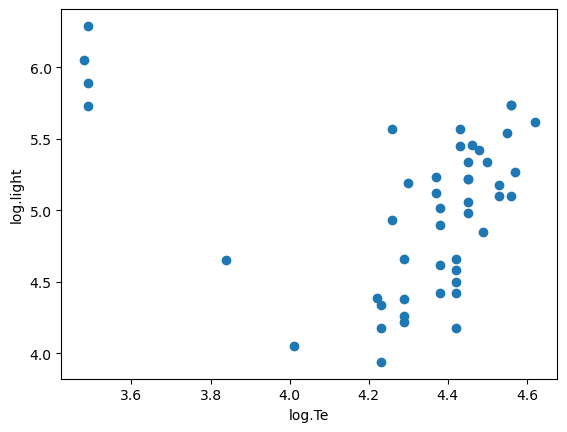

In [17]:
plt.scatter(X, Y)
plt.xlabel("log.Te")
plt.ylabel("log.light")
plt.show()

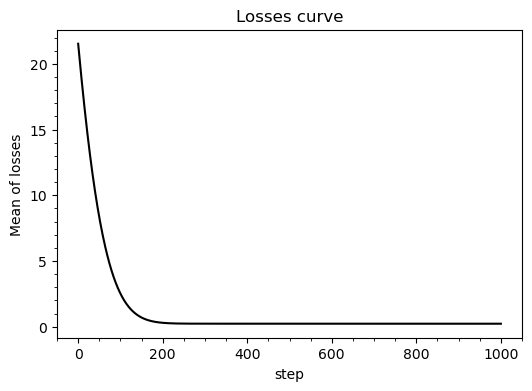

In [21]:
linmod1 = models.LinearModel(1)
alg1 = regr.regression(X[:,None], Y, linmod1, h=0.01)

plots.plot_losses(alg1)

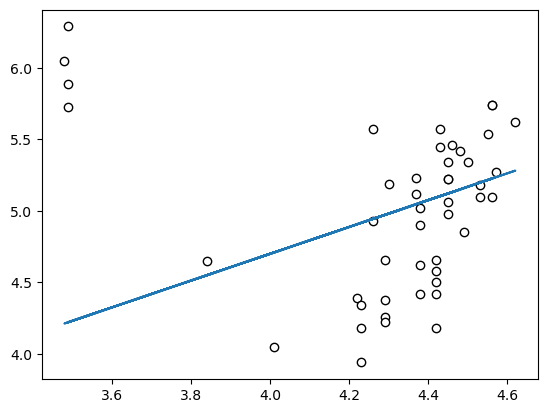

In [22]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod1.evaluate(X[:,None]))
plt.show()

In [23]:
E = abs(linmod1.evaluate(X[:,None]) - Y)

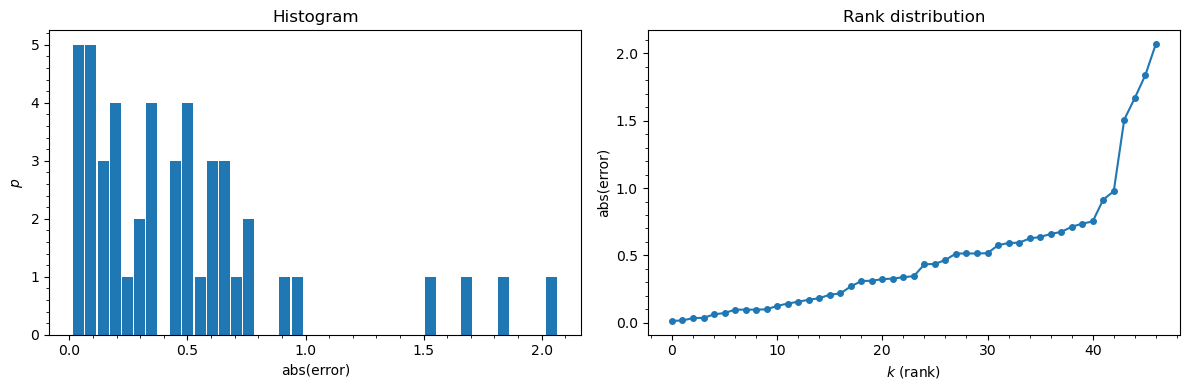

In [24]:
plots.plot_hist_and_rank_distribution(E, ylabel="abs(error)")

In [26]:
Z = inventory.zscore(E)

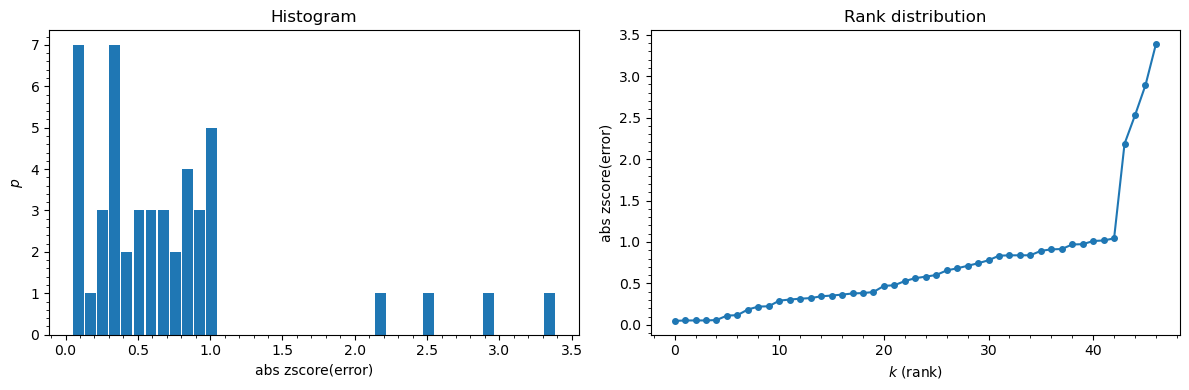

In [28]:
plots.plot_hist_and_rank_distribution(abs(Z), ylabel="abs zscore(error)")

In [29]:
Zm = inventory.modified_zscore(E)

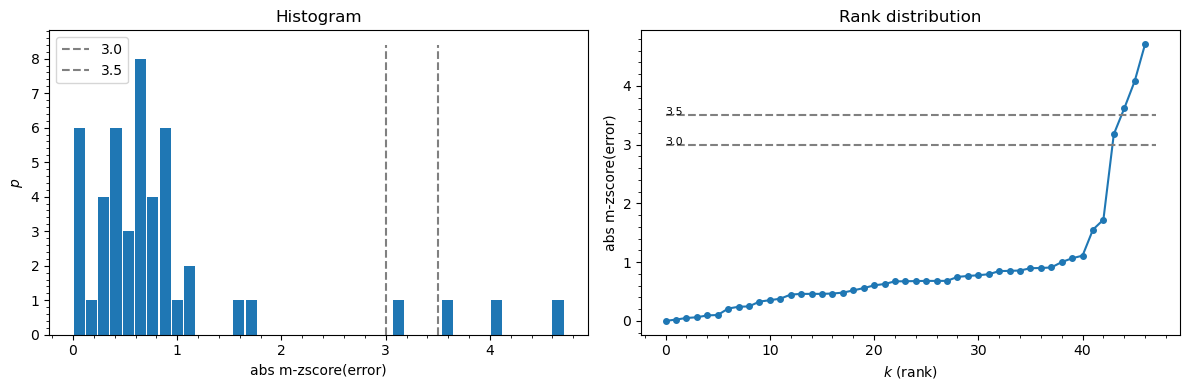

In [31]:
plots.plot_hist_and_rank_distribution(abs(Zm), ylabel="abs m-zscore(error)", levels=[3.0, 3.5])

In [32]:
X1 = X[Zm < 3.5]
Y1 = Y[Zm < 3.5]

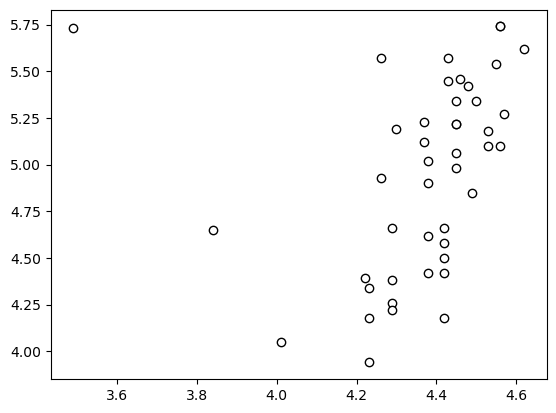

In [33]:
plt.scatter(X1, Y1, c="w", edgecolors="k")
plt.show()

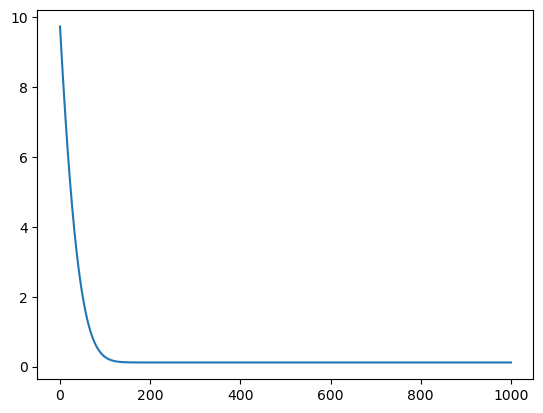

In [34]:
linmod2 = models.LinearModel(1)
alg2 = regr.regression(X1[:,None], Y1, linmod2, h=0.01)
plt.plot(alg2.lvals)
plt.show()

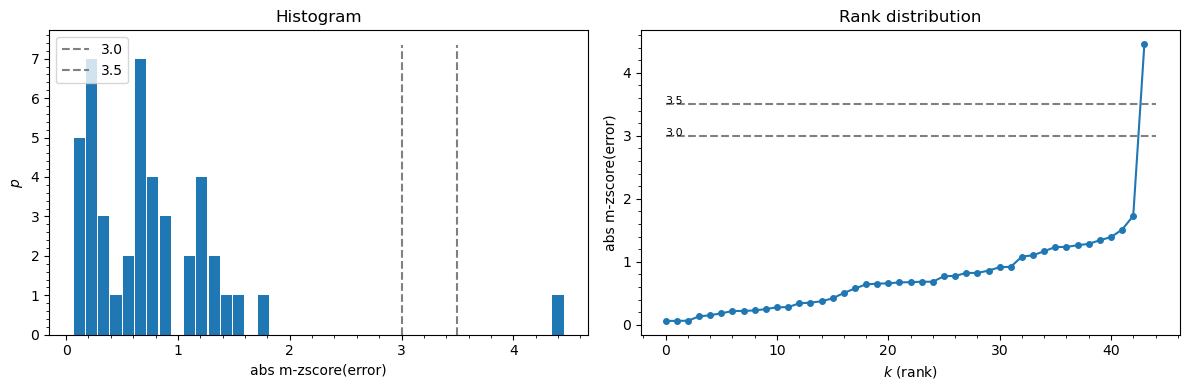

In [36]:
E2 = abs(linmod2.evaluate(X1[:,None]) - Y1)
Zm2 = inventory.modified_zscore(E2)

plots.plot_hist_and_rank_distribution(abs(Zm2), ylabel="abs m-zscore(error)", levels=[3.0, 3.5])

In [37]:
X2 = X1[Zm2 < 3.5]
Y2 = Y1[Zm2 < 3.5]

In [38]:
linmod3 = models.LinearModel(1)
alg3 = regr.regression(X2[:,None], Y2, linmod3, h=0.01)

In [39]:
E3 = abs(linmod3.evaluate(X2[:,None]) - Y2)
Zm3 = inventory.modified_zscore(E3)

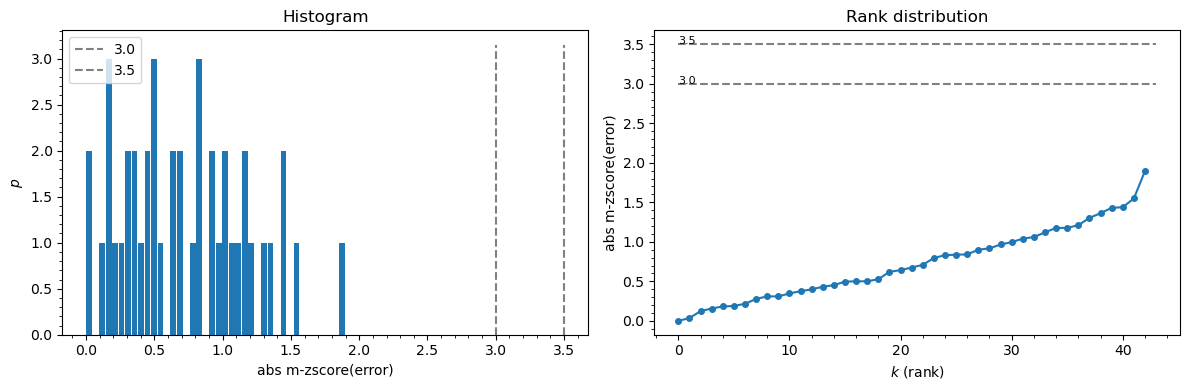

In [40]:
plots.plot_hist_and_rank_distribution(abs(Zm3), ylabel="abs m-zscore(error)", levels=[3.0, 3.5])

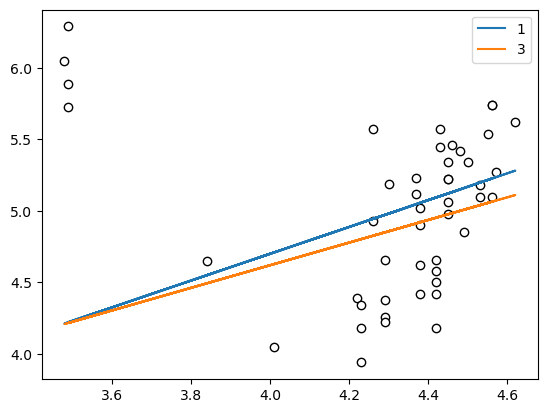

In [42]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod1.evaluate(X[:,None]), label="1")
plt.plot(X, linmod3.evaluate(X[:,None]), label="3")
plt.legend()
plt.show()

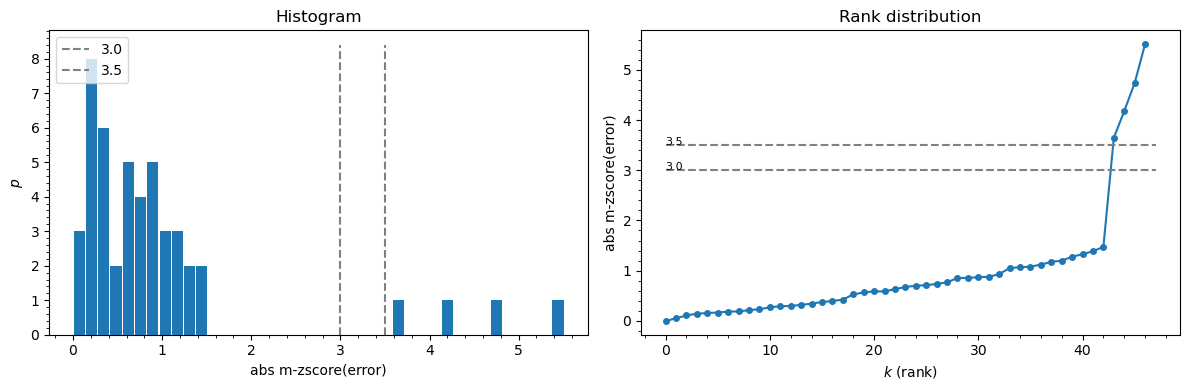

In [44]:
EE = abs(linmod3.evaluate(X[:,None]) - Y)
ZZ = inventory.modified_zscore(EE)

plots.plot_hist_and_rank_distribution(abs(ZZ), ylabel="abs m-zscore(error)", levels=[3.0, 3.5])